In [1]:
# DATA COLLECTION
# Step 1: Install dependencies (if not already installed)

# Step 2: Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 3: Fetch the AckoDrive Toyota cars page
url = "https://ackodrive.com/collection/toyota-cars/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Step 4: Select car cards using specific class names identified from inspection
car_cards = []

# Find the main container for car cards
cards_grid = soup.find('div', class_='CarBrowsingSection_cardsGrid__lVvIX')

if cards_grid:
    # Find all individual car cards within the grid
    car_cards = cards_grid.find_all('div', class_='BuyCarCard_card__AsGXF')

print(f"Found {len(car_cards)} potential car cards.")
if car_cards:
    print("First identified car card HTML for inspection:")
    print(car_cards[0].prettify())
else:
    print("No car cards found using the updated strategy. Printing full body for manual inspection.")
    body_tag = soup.find('body')
    if body_tag:
        print(body_tag.prettify()[:10000]) # Print first 10000 chars of body
    else:
        print("No body tag found. Something is wrong with HTML fetching.")

cars = []
for card in car_cards:
    model = ""
    price = ""
    fuel = ""
    transmission = ""

    # Extract model name
    model_element = card.find('a', class_='BuyCarCard_carName__SAJVh')
    if model_element:
        model = model_element.get_text(strip=True)

    # Extract price - target the specific price range element
    price_element = card.find('p', class_='BuyCarCard_priceRange__2q8tm')
    if price_element:
        price = price_element.get_text(strip=True)

    # Extract fuel type and transmission from specification items
    specification_items = card.find_all('p', class_='BuyCarCard_specificationItem__yn5cu')
    for item in specification_items:
        text = item.get_text(strip=True)
        # Assign fuel type only if it hasn't been set or if a more specific one is found
        if ('Petrol' in text or 'Diesel' in text or 'Electric' in text) and not fuel:
            fuel = text
        # Assign transmission type only if it hasn't been set or if a more specific one is found
        if ('Manual' in text or 'Automatic' in text) and not transmission:
            transmission = text

    # Build dictionary with required schema
    cars.append({
        "Model": model,
        "Kilometers Driven": "",
        "Year of Manufacture": "",
        "Fuel Type": fuel,
        "Transmission": transmission,
        "Price": price,
        "Location": "Mumbai",
        "Number of Owners": ""
    })

# Step 5: Convert to DataFrame
df = pd.DataFrame(cars)

# Step 6: Save to CSV
df.to_csv("acko_toyota_mumbai.csv", index=False)

# Step 7: Display first few rows
print(df.head())

# Step 8: Display the entire DataFrame
display(df)

Found 14 potential car cards.
First identified car card HTML for inspection:
<div class="BuyCarCard_card__AsGXF">
 <div class="BuyCarCard_expressDelivery__3Q3mY">
  <img alt="thunder" data-nimg="1" decoding="async" height="12" loading="lazy" src="https://ackodrive-prod.ackoassets.com/_next_static/icons/thunder.svg" style="color:transparent" width="12"/>
  <p class="">
   Express Delivery
  </p>
 </div>
 <div class="BuyCarCard_carImageWrapper__gpCmG">
  <div class="CarGalleryModal_carImageContainer___u3wZ">
   <!--$!-->
   <template data-dgst="BAILOUT_TO_CLIENT_SIDE_RENDERING">
   </template>
   <!--/$-->
   <!--$!-->
   <template data-dgst="BAILOUT_TO_CLIENT_SIDE_RENDERING">
   </template>
   <div class="LoadingSkeleton_skeletonCard__2s8U8">
   </div>
   <!--/$-->
  </div>
  <div class="BuyCarCard_bottomGradientOverlay__HBkL6">
  </div>
  <div class="BuyCarCard_ratingBadge__sUWEx">
   <div class="BuyCarCard_ratingImgWrapper__h5NRq">
    <img alt="rating star" data-nimg="1" decoding="as

,Model,Kilometers Driven,Year of Manufacture,Fuel Type,Transmission,Price,Location,Number of Owners
0,Toyota Glanza,,,Petrol • CNG,• Manual • Automatic,₹7.4 lakh – ₹10.4 lakh,Mumbai,
1,Toyota Urban Cruiser Hyryder,,,Petrol • CNG,• Manual • Automatic,₹12.7 lakh – ₹22.7 lakh,Mumbai,
2,Toyota Rumion,,,Petrol • CNG,Manual • Automatic,₹12.2 lakh – ₹15.8 lakh,Mumbai,
3,Toyota Innova Crysta,,,Diesel,Manual,₹22.4 lakh – ₹30.3 lakh,Mumbai,
4,Toyota Urban Cruiser Taisor,,,Petrol • CNG,Manual • Automatic,₹8.2 lakh – ₹14.0 lakh,Mumbai,
5,Toyota Fortuner Legender,,,Hybrid • Diesel,Manual • Automatic,₹49.7 lakh – ₹59.9 lakh,Mumbai,
6,Toyota Fortuner,,,Hybrid • Petrol • Diesel,Manual • Automatic,₹39.2 lakh – ₹58.6 lakh,Mumbai,
7,Toyota Camry,,,Hybrid • Petrol,Automatic,₹54.6 lakh – ₹54.8 lakh,Mumbai,
8,Toyota Vellfire,,,,Automatic,₹1.4 crore – ₹1.5 crore,Mumbai,
9,Toyota Hilux,,,Diesel,Manual • Automatic,₹35.4 lakh – ₹45.6 lakh,Mumbai,


In [2]:
# DATA CLEANING
import pandas as pd
import re

# Step 1: Load your CSV
df = pd.read_csv("acko_toyota_mumbai.csv")


# Step 2: Replace empty strings, spaces, or symbols with NaN
df.replace(["", " ", "  ", "-", "–", "."], pd.NA, inplace=True)

# Step 4: Clean Fuel Type and Transmission
df['Fuel Type'] = df['Fuel Type'].str.replace("•", ",").str.replace(" ,", ",").str.strip()
df['Transmission'] = df['Transmission'].str.replace("•", ",").str.replace(" ,", ",").str.strip()

df['Transmission'] = df['Transmission'].str.replace(', Manual', ' Manual', regex=False)

# Step 5: Clean Price and convert to numeric min/max
def convert_price(val):
    val = str(val).replace("₹","").replace(" ","")
    min_p, max_p = val.split("–")

    def to_number(x):
        if "lakh" in x:
            return float(x.replace("lakh","")) * 100000
        if "crore" in x:
            return float(x.replace("crore","")) * 10000000
        return float(x)

    return pd.Series([to_number(min_p), to_number(max_p)])

df[['Price_Min', 'Price_Max']] = df['Price'].apply(convert_price)

# Step 6: Extract Model Year from Model column
def extract_year(model):
    match = re.search(r'\((\d{4})', str(model))
    if match:
        return match.group(1)
    return "Unknown"

df['Model_Year'] = df['Model'].apply(extract_year)

# Step 7: Clean Model column (remove year brackets)
df['Model'] = df['Model'].str.replace(r"\(.*?\)", "", regex=True).str.strip()

# Step 8: Clean Location column (remove extra spaces)
df['Location'] = df['Location'].str.strip()

# Remove leading/trailing spaces for all string columns
df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)

# Replace multiple spaces between words with single space
df = df.apply(lambda col: col.str.replace(r"\s+", " ", regex=True) if col.dtype == "object" else col)

columns_to_drop = [
    "Kilometers Driven",
    "Year of Manufacture",
    "Number of Owners",
    "Model_Year"
]

df.drop(columns=columns_to_drop, inplace=True)

# Step 1: Calculate the mode (most common fuel type)
fuel_mode = df['Fuel Type'].mode()[0]

# Step 2: Fill NaN with the mode
df['Fuel Type'].fillna(fuel_mode, inplace=True)


# Step 9: Display the cleaned dataset
from IPython.display import display
display(df)

# Step 10: Save the fully cleaned CSV
df.to_csv("acko_toyota_mumbai_cleaned.csv", index=False)
print("Cleaned CSV saved as 'acko_toyota_mumbai_cleaned.csv'")


C:\Users\PMYLS\AppData\Local\Temp\ipykernel_9780\4101879730.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fuel Type'].fillna(fuel_mode, inplace=True)


,Model,Fuel Type,Transmission,Price,Location,Price_Min,Price_Max
0,Toyota Glanza,"Petrol, CNG","Manual, Automatic",₹7.4 lakh – ₹10.4 lakh,Mumbai,740000.0,1040000.0
1,Toyota Urban Cruiser Hyryder,"Petrol, CNG","Manual, Automatic",₹12.7 lakh – ₹22.7 lakh,Mumbai,1270000.0,2270000.0
2,Toyota Rumion,"Petrol, CNG","Manual, Automatic",₹12.2 lakh – ₹15.8 lakh,Mumbai,1220000.0,1580000.0
3,Toyota Innova Crysta,Diesel,Manual,₹22.4 lakh – ₹30.3 lakh,Mumbai,2240000.0,3030000.0
4,Toyota Urban Cruiser Taisor,"Petrol, CNG","Manual, Automatic",₹8.2 lakh – ₹14.0 lakh,Mumbai,820000.0,1400000.0
5,Toyota Fortuner Legender,"Hybrid, Diesel","Manual, Automatic",₹49.7 lakh – ₹59.9 lakh,Mumbai,4970000.0,5990000.0
6,Toyota Fortuner,"Hybrid, Petrol, Diesel","Manual, Automatic",₹39.2 lakh – ₹58.6 lakh,Mumbai,3920000.0,5860000.0
7,Toyota Camry,"Hybrid, Petrol",Automatic,₹54.6 lakh – ₹54.8 lakh,Mumbai,5460000.0,5480000.0
8,Toyota Vellfire,"Petrol, CNG",Automatic,₹1.4 crore – ₹1.5 crore,Mumbai,14000000.0,15000000.0
9,Toyota Hilux,Diesel,"Manual, Automatic",₹35.4 lakh – ₹45.6 lakh,Mumbai,3540000.0,4560000.0


Cleaned CSV saved as 'acko_toyota_mumbai_cleaned.csv'


In [3]:
import pandas as pd
import numpy as np

INPUT_FILE = 'acko_toyota_mumbai_cleaned.csv'
OUTPUT_FILE = 'acko_toyota_mumbai_Final.csv'

# Load the Data
df = pd.read_csv(INPUT_FILE)

# Calculate Average Price in Lakhs

def calculate_avg_price_lakhs(price_range):
    """
    Cleans the price string to extract the average price in Lakhs.
    Handles 'lakh' and 'crore' units.
    """
    price_range = price_range.replace('₹', '').replace(',', '').strip()
    min_price_str, max_price_str = price_range.split('–')

    prices = []
    for price_str in [min_price_str.strip(), max_price_str.strip()]:
        parts = price_str.split(' ')
        value = float(parts[0])
        unit = parts[1]

        if 'crore' in unit.lower():
            prices.append(value * 100)
        elif 'lakh' in unit.lower():
            prices.append(value)
        else:
            prices.append(np.nan)
    return np.mean(prices)

# Applying the function to create the numerical 'Avg_Price_Lakhs' column
df['Avg_Price_Lakhs'] = df['Price'].apply(calculate_avg_price_lakhs)

# --- Feature Engineering: Create 'Price Category' ---
bins = [0, 15, 30, df['Avg_Price_Lakhs'].max() + 1]
labels = ['Low (Budget)', 'Medium (Mid-Range)', 'High (Premium)']

df['Price Category'] = pd.cut(
    df['Avg_Price_Lakhs'],
    bins=bins,
    labels=labels,
    right=False
)

# --- Save the Updated File ---
df.to_csv(OUTPUT_FILE, index=False)
display(df)

,Model,Fuel Type,Transmission,Price,Location,Price_Min,Price_Max,Avg_Price_Lakhs,Price Category
0,Toyota Glanza,"Petrol, CNG","Manual, Automatic",₹7.4 lakh – ₹10.4 lakh,Mumbai,740000.0,1040000.0,8.90,Low (Budget)
1,Toyota Urban Cruiser Hyryder,"Petrol, CNG","Manual, Automatic",₹12.7 lakh – ₹22.7 lakh,Mumbai,1270000.0,2270000.0,17.70,Medium (Mid-Range)
2,Toyota Rumion,"Petrol, CNG","Manual, Automatic",₹12.2 lakh – ₹15.8 lakh,Mumbai,1220000.0,1580000.0,14.00,Low (Budget)
3,Toyota Innova Crysta,Diesel,Manual,₹22.4 lakh – ₹30.3 lakh,Mumbai,2240000.0,3030000.0,26.35,Medium (Mid-Range)
4,Toyota Urban Cruiser Taisor,"Petrol, CNG","Manual, Automatic",₹8.2 lakh – ₹14.0 lakh,Mumbai,820000.0,1400000.0,11.10,Low (Budget)
5,Toyota Fortuner Legender,"Hybrid, Diesel","Manual, Automatic",₹49.7 lakh – ₹59.9 lakh,Mumbai,4970000.0,5990000.0,54.80,High (Premium)
6,Toyota Fortuner,"Hybrid, Petrol, Diesel","Manual, Automatic",₹39.2 lakh – ₹58.6 lakh,Mumbai,3920000.0,5860000.0,48.90,High (Premium)
7,Toyota Camry,"Hybrid, Petrol",Automatic,₹54.6 lakh – ₹54.8 lakh,Mumbai,5460000.0,5480000.0,54.70,High (Premium)
8,Toyota Vellfire,"Petrol, CNG",Automatic,₹1.4 crore – ₹1.5 crore,Mumbai,14000000.0,15000000.0,145.00,High (Premium)
9,Toyota Hilux,Diesel,"Manual, Automatic",₹35.4 lakh – ₹45.6 lakh,Mumbai,3540000.0,4560000.0,40.50,High (Premium)


C:\Users\PMYLS\AppData\Local\Temp\ipykernel_9780\4133475850.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\PMYLS\AppData\Local\Temp\ipykernel_9780\4133475850.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(



--- Cross-Analysis: Price Category vs. Fuel Type ---

Visualization plots generated with distinct chart types.


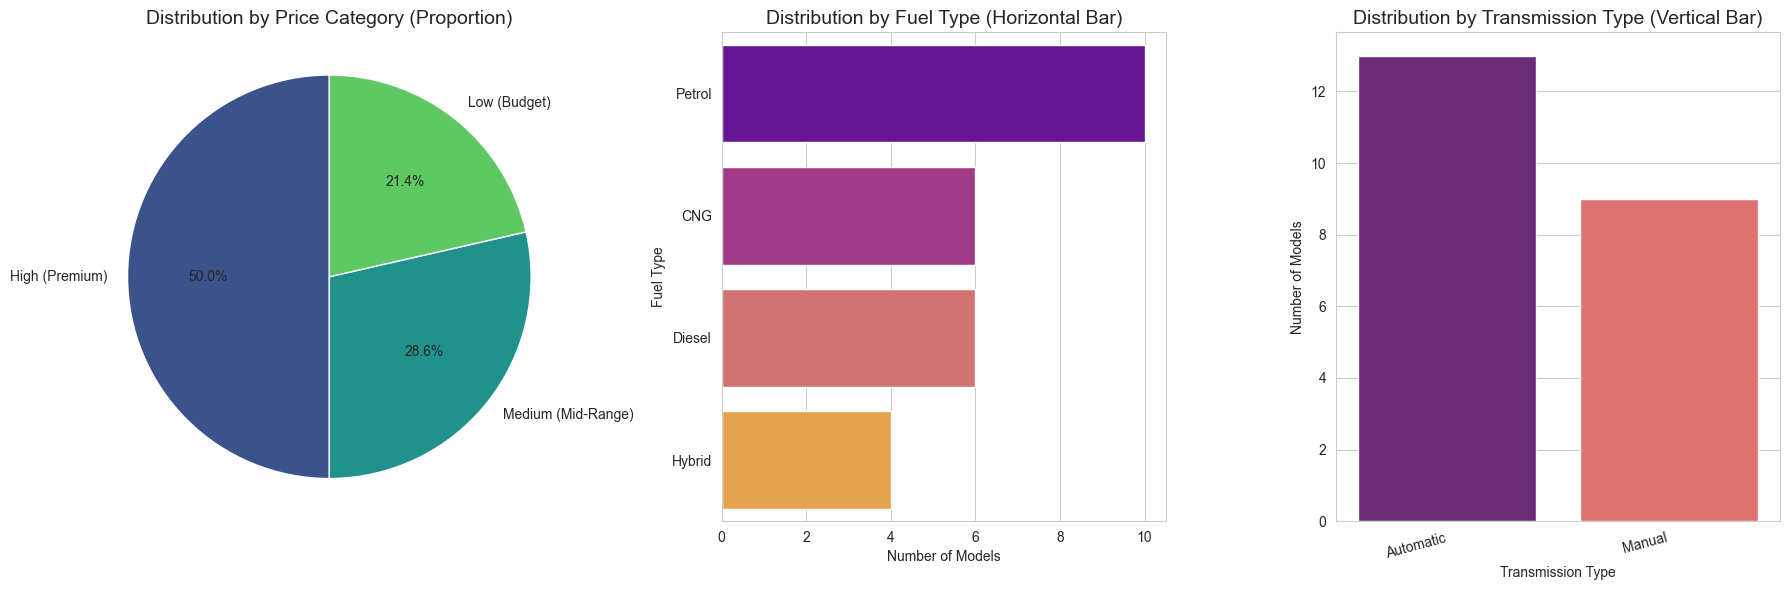

<Figure size 1000x600 with 0 Axes>

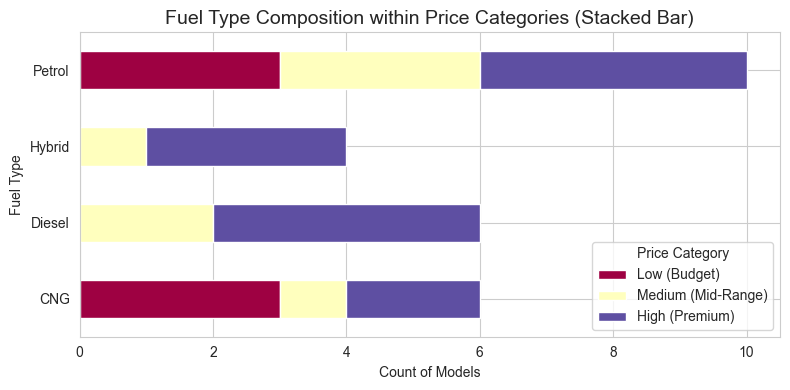

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot style
sns.set_style("whitegrid")

# Define the file name created by the calculation step.
# Using the calculated file name from the previous execution.
INPUT_FILE = 'acko_toyota_mumbai_Final.csv'

# --- Load the Calculated Data ---
df_viz = pd.read_csv(INPUT_FILE)

# --- Visualization ---

# 1. Price Category Distribution: Pie Chart (to show proportion)
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)

price_counts = df_viz['Price Category'].value_counts()
plt.pie(
    price_counts,
    labels=price_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('viridis', len(price_counts))
)
plt.title('Distribution by Price Category (Proportion)', fontsize=14)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.


# 2. Fuel Type Distribution: Horizontal Count Plot (Bar Chart)
fuel_types_series = df_viz['Fuel Type'].str.split(', ').explode()
plt.subplot(1, 3, 2)
sns.countplot(
    y=fuel_types_series,
    order=fuel_types_series.value_counts().index,
    palette='plasma'
)
plt.title('Distribution by Fuel Type (Horizontal Bar)', fontsize=14)
plt.xlabel('Number of Models')
plt.ylabel('Fuel Type')


# 3. Transmission Type Distribution: Vertical Count Plot (Bar Chart)
trans_types_series = df_viz['Transmission'].str.split(', ').explode()
plt.subplot(1, 3, 3)
sns.countplot(
    x=trans_types_series, # Changed to x-axis for a vertical bar plot
    order=trans_types_series.value_counts().index,
    palette='magma'
)
plt.title('Distribution by Transmission Type (Vertical Bar)', fontsize=14)
plt.xlabel('Transmission Type')
plt.ylabel('Number of Models')
plt.xticks(rotation=15, ha='right')


plt.tight_layout()
plt.savefig('key_distributions_modified_charts.png')


# 4. Cross-Analysis Plot: Fuel Type vs. Price Category (Stacked Bar Chart)
print("\n--- Cross-Analysis: Price Category vs. Fuel Type ---")
plt.figure(figsize=(10, 6))

# Prepare data for Stacked Bar Chart
temp_df = df_viz.assign(Fuel_Type_Exploded=df_viz['Fuel Type'].str.split(', ')).explode('Fuel_Type_Exploded')
pivot_table = temp_df.groupby(['Fuel_Type_Exploded', 'Price Category']).size().unstack(fill_value=0)

# Reorder columns to ensure proper stacking order
category_order = ['Low (Budget)', 'Medium (Mid-Range)', 'High (Premium)']
pivot_table = pivot_table.reindex(columns=category_order, fill_value=0)

ax = pivot_table.plot(
    kind='barh',
    stacked=True,
    figsize=(8, 4),
    colormap='Spectral',
    legend=True
)
plt.title('Fuel Type Composition within Price Categories (Stacked Bar)', fontsize=14)
plt.xlabel('Count of Models')
plt.ylabel('Fuel Type')
plt.legend(title='Price Category')
plt.tight_layout()
plt.savefig('price_fuel_cross_analysis_stacked.png')

print("\nVisualization plots generated with distinct chart types.")